In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
import seaborn as sb

loan = pd.read_csv("applications.csv")
loan.head()

,Unnamed: 0,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,"100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#loan_id_length = loan['LOAN_ID'].apply(len)

#loan_trimmed = loan[len(loan["LOAN_ID"]) < 7]
#loan_trimmed.head(5)

#loan_length = (loan['LOAN_ID'].str.len() == 10)
#loan = loan.loc[loan_length]
#print(loan)


loan_trimmed = loan[loan["LOAN_ID"].map(len) == 6]
loan_trimmed.head(5)

,Unnamed: 0,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,100009,0.0,Cash loans,F,Y,Y,1.0,171000.0,1560726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [66]:
loan_trimmed.describe()

,Unnamed: 0,LOAN_DEFAULT,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,23397.000000,23397.000000,23397.000000,2.339700e+04,2.339700e+04,23397.000000,2.337500e+04,23397.000000,23397.000000,23397.000000,...,23397.000000,23397.000000,23397.000000,23397.000000,20181.000000,20181.000000,20181.000000,20181.000000,20181.000000,20181.000000
mean,15370.462111,0.083173,0.420524,1.675337e+05,5.969064e+05,27082.672137,5.360546e+05,0.020647,-15995.186178,64023.880327,...,0.008249,0.000598,0.000556,0.000427,0.006888,0.007928,0.033299,0.268768,0.256727,1.891878
std,8879.303536,0.276150,0.727529,9.856913e+04,3.989251e+05,14569.858280,3.662844e+05,0.013882,4357.713390,141443.142415,...,0.090450,0.024455,0.023566,0.020670,0.087935,0.122885,0.201779,0.933736,0.603627,1.864967
min,2.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25166.000000,-16365.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7667.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16447.500000,2.385000e+05,0.010006,-19642.000000,-2750.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15320.000000,0.000000,0.000000,1.440000e+05,5.123385e+05,24939.000000,4.500000e+05,0.018850,-15721.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,23086.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12323.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30751.000000,1.000000,9.000000,3.825000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7689.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [67]:
loan_trimmed.shape

(23397, 123)

In [3]:
#loan_trimmed = loan_trimmed[loan_trimmed['DAYS_BIRTH'] == abs]
loan_trimmed["DAYS_BIRTH"] = loan_trimmed["DAYS_BIRTH"].map(lambda x: abs(x//-365))
loan_trimmed

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,2,100003,0.0,Cash loans,F,N,N,0.0,270000.000,1293502.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.000,135000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,100006,0.0,Cash loans,F,N,Y,0.0,135000.000,312682.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,100007,0.0,Cash loans,M,N,Y,0.0,121500.000,513000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,100009,0.0,Cash loans,F,Y,Y,1.0,171000.000,1560726.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
7,8,100010,0.0,Cash loans,M,Y,Y,0.0,360000.000,1530000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,100011,0.0,Cash loans,F,N,Y,0.0,112500.000,1019610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10,100012,0.0,Revolving loans,M,N,Y,0.0,135000.000,405000.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10,11,100014,0.0,Cash loans,F,N,Y,1.0,112500.000,652500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,12,100015,0.0,Cash loans,F,N,Y,0.0,38419.155,148365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [4]:
#car_own = loan_trimmed.groupby(['OWN_CAR','LOAN_ID']).sum()
#car_own = loan_trimmed[loan_trimmed["OWN_CAR","LOAN_ID"]]
car_own = loan_trimmed[["OWN_CAR","LOAN_ID","LOAN_DEFAULT"]]
car_own.head(5)
#car_own.columns

,OWN_CAR,LOAN_ID,LOAN_DEFAULT
1,N,100003,0.0
2,Y,100004,0.0
3,N,100006,0.0
4,N,100007,0.0
6,Y,100009,0.0


In [5]:
car_own = car_own.groupby(['OWN_CAR','LOAN_DEFAULT']).count()
#car_own.groupby(['OWN_CAR']).count().plot.bar()
car_own

LOAN_ID
OWN_CAR LOAN_DEFAULT         
N       0.0             13998
        1.0              1331
Y       0.0              7453
        1.0               615

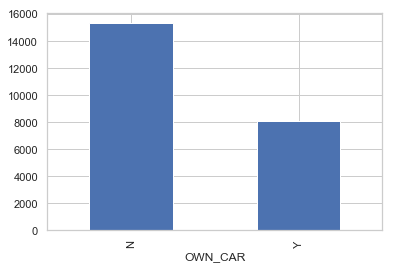

In [106]:
car_owner = loan_trimmed.groupby('OWN_CAR')['LOAN_ID'].count().sort_values(ascending=False).head(10).plot.bar()
car_owner

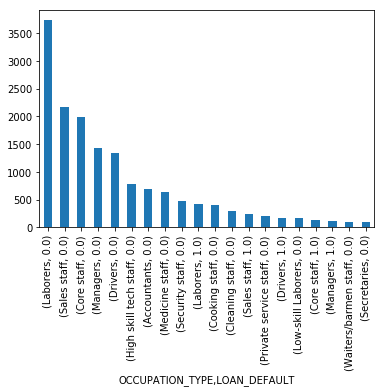

In [9]:
occ_type = loan_trimmed[["OCCUPATION_TYPE","LOAN_ID","LOAN_DEFAULT"]]
#loan_trimmed
occ_type.groupby(['OCCUPATION_TYPE','LOAN_DEFAULT'])['LOAN_ID'].count().sort_values(ascending=False).head(20).plot.bar()

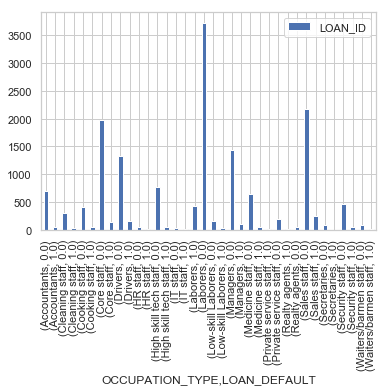

In [81]:
occ_type = loan_trimmed[["OCCUPATION_TYPE","LOAN_ID"]]
occ_type2 = loan_trimmed["LOAN_DEFAULT","LOAN_ID"]
occ_type = occ_type.groupby(['OCCUPATION_TYPE','LOAN_DEFAULT']).count()
#car_own.groupby(['OWN_CAR']).count().plot.bar()
occ_type.sort_values(ascending=True, by="OCCUPATION_TYPE").plot.bar()

In [56]:
# OWN_CAR & OCCUPATION_TYPE

#sb.set(style="whitegrid")
#tips = sb.load_dataset("tips")
sb.barplot(x='OWN_CAR', y='LOAN_ID', data=car_own)

ValueError: Could not interpret input 'OWN_CAR'

In [ ]:
#own_car.groupby('country')['imdb_score'].median().sort_values(ascending=False).head(10).plot.bar()

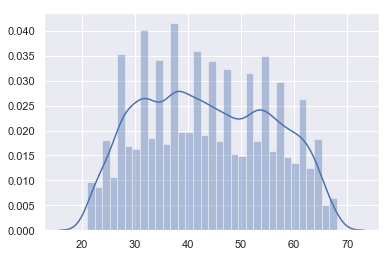

In [16]:
loan_trimmed_default = loan_trimmed[loan_trimmed['LOAN_DEFAULT'] == 0]
sb.set()
x = loan_trimmed_default['DAYS_BIRTH'].tolist()
ax = sb.distplot(x)

# 